<a href="https://colab.research.google.com/github/Davyeeh/Trabalho-Lab.-CD/blob/main/TrabalhoFinal_LAB_C_D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dados originais


link: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey




# 1.1 Dashboard criado
link: https://saude-tecnologia-ufc.streamlit.app/

## Metadados

### Informações do Dataset

Este conjunto de dados é de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de transtornos de saúde mental no local de trabalho tecnológico. Você também é incentivado a analisar os dados da pesquisa em andamento de 2016 encontrada aqui.

### Conteúdo

Este conjunto de dados contém os seguintes dados:

* Timestamp

* Age

* Gender

* Country

* state: Se você mora nos Estados Unidos, em qual estado ou território você mora?

* self_employed: Você trabalha por conta própria?

* family_history: Você tem histórico familiar de doença mental?

* treatment: Você procurou tratamento para um problema de saúde mental?

* work_interfere: Se você tem algum problema de saúde mental, sente que isso interfere no seu trabalho?

* no_employees: Quantos funcionários sua empresa ou organização possui?

* remote_work: Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?

* tech_company: O seu empregador é principalmente uma empresa/organização de tecnologia?

* benefits: Seu empregador oferece benefícios de saúde mental?

* care_options: Você conhece as opções de cuidados de saúde mental que seu empregador oferece?

* wellness_program: Seu empregador já discutiu a saúde mental como parte de um programa de bem-estar para funcionários?

* seek_help: O seu empregador fornece recursos para aprender mais sobre questões de saúde mental e como procurar ajuda?

* anonymity: O seu anonimato está protegido se você optar por aproveitar as vantagens dos recursos de tratamento de saúde mental ou abuso de substâncias?

* leave: É fácil para você tirar licença médica por um problema de saúde mental?

* mental_health_consequence: Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?

* phys_health_consequence: Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?

* coworkers: Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?

* supervisor: Você estaria disposto a discutir um problema de saúde mental com seu(s) supervisor(es) direto(s)?

* mental_health_interview: Você abordaria um problema de saúde mental com um potencial empregador em uma entrevista?

* phys_health_interview: Você abordaria um problema de saúde física com um potencial empregador em uma entrevista?

* mental_vs_physical: Você acha que seu empregador leva a saúde mental tão a sério quanto a saúde física?

* obs_consequence: Você já ouviu falar ou observou consequências negativas para colegas de trabalho com problemas de saúde mental em seu local de trabalho?

* comments: Quaisquer notas ou comentários adicionais

# 2. Importação de bibliotecas necessárias e da base de dados

In [ ]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Base de dados
dados = pd.read_csv('https://raw.githubusercontent.com/Davyeeh/Trabalho-Lab.-CD./refs/heads/main/survey.csv', sep=',')
print(dados.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# 3. Limpeza do Dataset, padronização e tradução dos dados

## Sobre valores vazios

### Verificação de valores vazios

In [ ]:
# Verificação de valores vazios em cada coluna
valores_perdidos = dados.isna().sum()
print('Valores em falta\n')
print(valores_perdidos)
print('='*50)

# Verificação de porcentagem de valores faltantes em cada coluna
perdidos_porcentagem = (dados.isna().sum() / len(dados)) * 100
print('Porcentagem de valores em falta\n')
print(perdidos_porcentagem)
print('='*50)

Valores em falta

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64
Porcentagem de valores em falta

Timestamp         

## Preenchimento de valores vazios

In [ ]:
# Preencheendo os valores vazios da coluna 'self_employed' com 'Não informado'
dados['self_employed'] = dados['self_employed'].fillna('Não informado')
print("Coluna 'self_employed'")
print(dados['self_employed'])
print('='*50)

# Os valores vazios na coluna de 'state' representa pessoas que não moram nos Estados Unidos.
dados['state'] = dados['state'].fillna('Não reside nos Estados Unidos')
print("Coluna 'state'")
print(dados['state'])
print('='*50)

# Os valores vazios na coluna de 'work_interfere' são pessoa que não possuem nenhum problema mental.
dados['work_interfere'] = dados['work_interfere'].fillna('Não possui algum problema mental')
print("Coluna 'work_interference'")
print(dados['work_interfere'])
print('='*50)

# E na coluna 'Comments' são pessoas que não possuem comentários a serem adicionados.
dados['comments'] = dados['comments'].fillna('Não possui comentários')
print("Coluna 'comments'")
print(dados['comments'])
print('='*50)

# Verificação dos valores
print('Valores em falta\n')
print(valores_perdidos)


Coluna 'self_employed'
0       Não informado
1       Não informado
2       Não informado
3       Não informado
4       Não informado
            ...      
1254               No
1255               No
1256               No
1257               No
1258               No
Name: self_employed, Length: 1259, dtype: object
Coluna 'state'
0                                  IL
1                                  IN
2       Não reside nos Estados Unidos
3       Não reside nos Estados Unidos
4                                  TX
                    ...              
1254    Não reside nos Estados Unidos
1255                               IL
1256                               CA
1257                               NC
1258                               IL
Name: state, Length: 1259, dtype: object
Coluna 'work_interference'
0                                  Often
1                                 Rarely
2                                 Rarely
3                                  Often
4                    

## Sobre Padronização dos dados

In [ ]:
# Varificação de valores únicos em cada coluna
valores_unicos = dados.nunique()
print(valores_unicos)
print('='*50)

# Padronização de 'Gender'
print(dados['Gender'].unique())
genero_padrão = {
    'M': 'Male',
    'm': 'Male',
    'male':'Male',
    'Male-ish': 'Male',
    'Mal': 'Male',
    'Cis Male': 'Male',
    'cis male': 'Male',
    'Male (CIS)': 'Male',
    'Make': 'Male',
    'Guy (-ish) ^_^': 'Male',
    'maile': 'Male',
    'male leaning androgynous': 'Male',
    'Male ': 'Male',
    'Man': 'Male',
    'Mail': 'Male',
    'Malr': 'Male',
    'ostensibly male, unsure what that really means': 'Male',
    'Cis Man': 'Male',
    'something kinda male?': 'Male',
    'msle': 'Male',
    'female': 'Female',
    'Cis Female': 'Female',
    'F': 'Female',
    'Trans woman': 'Female',
    'Trans-female': 'Female',
    'Female (trans)': 'Female',
    'Femake': 'Female',
    'woman': 'Female',
    'Woman': 'Female',
    'f': 'Female',
    'Female ': 'Female',
    'Female (cis)': 'Female',
    'cis-female/femme': 'Female',
    'femail': 'Female',
    'queer': 'Queer',
    'queer/she/they': 'Queer',
    'Genderqueer': 'Queer',
    'non-binary': 'Non-binary',
    'Enby': 'Non-binary',
    'fluid': 'Fluid',
    'Neuter': 'Agender',
    'A little about you': 'Não informado',
    'Nah': 'Não informado',
    'p': 'Não informado'
}
dados['Gender'] = dados['Gender'].map(lambda x: genero_padrão.get(x, x))
print(dados['Gender'].unique())
print('='*50)

# Padronização da coluna 'state'
print(dados['state'].unique())
us_state_to_abbrev = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District of Columbia",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "PR": "Puerto Rico",
    "VI": "Virgin Islands",
    "GU": "Guam",
    "MP": "Northern Mariana Islands",
    "AS": "American Samoa",
    "FSM": "Federated States of Micronesia",
    "UM": "United States Minor Outlying Islands",
}
dados['state'] = dados['state'].map(lambda x: us_state_to_abbrev.get(x, x))
print(dados['state'].unique())

'''
As demais colunas não precisam de padronização pois são perguntas de 'sim', 'não', 'talvez' ou 'não informado'.
'''


Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          46
self_employed                   3
family_history                  2
treatment                       2
work_interfere                  5
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      161
dtype: int64
['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-fe

"\nAs demais colunas não precisam de padronização pois são perguntas de 'sim', 'não', 'talvez' ou 'não informado'.\n"

## Sobre a tradução dos dados

### Tradução das colunas




In [ ]:
# Traduçao das colunas para melhor entendimento dos dados
traducao_colunas = {
    'Timestamp': 'Carimbo_de_data_hora',
    'Age': 'Idade',
    'Gender': 'Genero',
    'Country': 'Pais',
    'state': 'Estado',
    'self_employed': 'Trabalhador_autonomo',
    'family_history': 'Historico_familiar',
    'treatment': 'Tratamento',
    'work_interfere': 'Interfere_no_trabalho',
    'no_employees': 'Numero_de_empregados',
    'remote_work': 'Trabalho_remoto',
    'tech_company': 'Empresa_de_tecnologia',
    'benefits': 'Beneficios',
    'care_options': 'Opcoes_de_cuidado',
    'wellness_program': 'Programa_de_bem_estar',
    'seek_help': 'Procurar_ajuda',
    'anonymity': 'Anonimato',
    'leave': 'Licenca',
    'mental_health_consequence': 'Consequencia_saude_mental',
    'phys_health_consequence': 'Consequencia_saude_fisica',
    'coworkers': 'Colegas_de_trabalho',
    'supervisor': 'Supervisor',
    'mental_health_interview': 'Entrevista_saude_mental',
    'phys_health_interview': 'Entrevista_saude_fisica',
    'mental_vs_physical': 'Mental_vs_fisica',
    'obs_consequence': 'Consequencia_observada',
    'comments': 'Comentarios'
}

dados = dados.rename(columns=traducao_colunas)
print(dados.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Carimbo_de_data_hora       1259 non-null   object
 1   Idade                      1259 non-null   int64 
 2   Genero                     1259 non-null   object
 3   Pais                       1259 non-null   object
 4   Estado                     1259 non-null   object
 5   Trabalhador_autonomo       1259 non-null   object
 6   Historico_familiar         1259 non-null   object
 7   Tratamento                 1259 non-null   object
 8   Interfere_no_trabalho      1259 non-null   object
 9   Numero_de_empregados       1259 non-null   object
 10  Trabalho_remoto            1259 non-null   object
 11  Empresa_de_tecnologia      1259 non-null   object
 12  Beneficios                 1259 non-null   object
 13  Opcoes_de_cuidado          1259 non-null   object
 14  Programa

### Tradução das linhas

In [ ]:
# Tradução das tuplas

# Tradução de Genero
print('Tradução de Genero')
print(dados['Genero'].unique())
traducao_genero = {
    'Female': 'Feminino',
    'Male': 'Masculino',
    'Non-binary': 'Não binário',
    'All': 'Todos',
    'Fluid': 'Fluido',
    'Androgyne': 'Andrógino',
    'Agender': 'Agênero'

}
dados['Genero'] = dados['Genero'].map(lambda x: traducao_genero.get(x, x))
print(dados['Genero'].unique())
print('='*50)

# Tradução de País
print('Tradução de País')
paises_unicos = dados['Pais'].unique()
print(paises_unicos)

traducao_paises = {'United States': 'Estados Unidos',
                   'Canada': 'Canadá',
                   'United Kingdom': 'Reino Unido',
                   'Bulgaria': 'Bulgária',
                   'France': 'França',
                   'Portugal': 'Portugal',
                   'Netherlands': 'Holanda',
                   'Switzerland': 'Suíça',
                   'Poland': 'Polônia',
                   'Australia': 'Austrália',
                   'Germany': 'Alemanha',
                   'Russia': 'Rússia',
                   'Mexico': 'México',
                   'Brazil': 'Brasil',
                   'Slovenia': 'Eslovênia',
                   'Costa Rica': 'Costa Rica',
                   'Austria': 'Áustria',
                   'Ireland': 'Irlanda',
                   'India': 'Índia',
                   'South Africa': 'África do Sul',
                   'Italy': 'Itália',
                   'Sweden': 'Suécia',
                   'Colombia': 'Colômbia',
                   'Latvia': 'Letônia',
                   'Romania': 'Romênia',
                   'Belgium': 'Bélgica',
                   'New Zealand': 'Nova Zelândia',
                   'Zimbabwe': 'Zimbábue',
                   'Spain': 'Espanha',
                   'Finland': 'Finlândia',
                   'Uruguay': 'Uruguai',
                   'Israel': 'Isrrael',
                   'Bosnia and Herzegovina': 'Bósnia e Herzegovina',
                   'Hungary': 'Hungria',
                   'Singapore': 'Cingapura',
                   'Japan': 'Japão',
                   'Nigeria': 'Nigéria',
                   'Croatia': 'Croácia',
                   'Norway': 'Noruega',
                   'Thailand': 'Tailândia',
                   'Denmark': 'Dinamarca',
                   'Bahamas, The': 'Bahamas',
                   'Greece': 'Grécia',
                   'Moldova': 'Moldávia',
                   'Georgia': 'Geórgia',
                   'China': 'China',
                   'Czech Republic': 'República Tcheca',
                   'Philippines': 'Filipinas'
                   }
dados['Pais'] = dados['Pais'].map(lambda x: traducao_paises.get(x, x))
print(dados['Pais'].unique())
print('='*50)

# Tradução pra linhas de resposta sim, não, talvez, etc
traducao_sim_ou_não = {
    'Yes': 'Sim',
    'No': 'Não',
    'Not sure': 'Não tenho certeza',
    "Don't know": 'Não sei',
    'Maybe': "Talvez",
    'Some of them': 'Alguns deles'
    }
# Trabalhador_autonomo
print('Tradução de Trabalhador_autonomo')

print(dados['Trabalhador_autonomo'].unique())
dados['Trabalhador_autonomo'] = dados['Trabalhador_autonomo'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Trabalhador_autonomo'].unique())
print('='*50)

# Historico_familiar
print('TRadução de historico_familiar')

print(dados['Historico_familiar'].unique())
dados['Historico_familiar'] = dados['Historico_familiar'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Historico_familiar'].unique())
print('='*50)

# Tratamento
print('Tradução de Tratamento')

print(dados['Tratamento'].unique())
dados['Tratamento'] = dados['Tratamento'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Tratamento'].unique())
print('='*50)

# Interfere_no_trabalho
print("Tradução de Intefere_no_trabalho")

print(dados['Interfere_no_trabalho'].unique())
traducao_interfere = {
    'Often': 'Muito',
    'Rarely': 'Raramente',
    'Sometimes': 'Quase sempre',
    'Never': 'Nunca'
}
dados['Interfere_no_trabalho'] = dados['Interfere_no_trabalho'].map(lambda x: traducao_interfere.get(x, x))
print(dados['Interfere_no_trabalho'].unique())
print('='*50)

# Numero_de_empregados
print('Tradução de NUmro_de_empregados')

print(dados['Numero_de_empregados'].unique())
traducao_empregados = {
    'More than 1000' : 'Mais de 1000'
}
dados['Numero_de_empregados'] = dados['Numero_de_empregados'].map(lambda x: traducao_empregados.get(x, x))
print(dados['Numero_de_empregados'].unique())
print('='*50)

# Trabalho_remoto
print('Traduçao de trabalho_remoto')

print(dados['Trabalho_remoto'].unique())
dados['Trabalho_remoto'] = dados['Trabalho_remoto'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Trabalho_remoto'].unique())
print('='*50)

# Tradução Empresa_de_tecnologia
print('Tradução de Empresa_de_tecnologia')
print(dados['Empresa_de_tecnologia'].unique())
dados['Empresa_de_tecnologia'] = dados['Empresa_de_tecnologia'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Empresa_de_tecnologia'].unique())
print('='*50)

# Traduçao de Benefícios
print('Tradução de Beneficios')

print(dados['Beneficios'].unique())
dados['Beneficios'] = dados['Beneficios'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Beneficios'].unique())
print('='*50)

# Tradução de Opcoes_de_cuidado
print('Tradução de opcoes_de_cuidado')

print(dados['Opcoes_de_cuidado'].unique())
dados['Opcoes_de_cuidado'] = dados['Opcoes_de_cuidado'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Opcoes_de_cuidado'].unique())
print('='*50)

# Tradução de Programa_de_bem_estar
print('Tradução de programa_de_bem_estar')

print(dados['Programa_de_bem_estar'].unique())
dados['Programa_de_bem_estar'] = dados['Programa_de_bem_estar'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Programa_de_bem_estar'].unique())
print('='*50)

# Tradução de Procurar_ajuda
print('Tradução de Procurar_ajuda')

print(dados['Procurar_ajuda'].unique())
dados['Procurar_ajuda'] = dados['Procurar_ajuda'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Procurar_ajuda'].unique())
print('='*50)

# Tradução de Anonimato
print('Tradução de Anonimato')

print(dados['Anonimato'].unique())
dados['Anonimato'] = dados['Anonimato'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Anonimato'].unique())
print('='*50)

# TRadução de Licenca
print('Tradução de Licenca')

print(dados['Licenca'].unique())
traducao_licensa = {
    'Somewhat easy': "Um pouco fácil",
    "Don't know": "Não sei",
    'Somewhat difficult': "Um pouco difícil",
    'Very difficult': "Muito difícil",
    'Very easy': "Muito fácil"
}
dados['Licenca'] = dados['Licenca'].map(lambda x: traducao_licensa.get(x, x))
print(dados['Licenca'].unique())
print('='*50)

# tradução de Consequencia_saude_mental
print("Tradução Consequencia_saude_mental")

print(dados['Consequencia_saude_mental'].unique())
dados['Consequencia_saude_mental'] = dados['Consequencia_saude_mental'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Consequencia_saude_mental'].unique())
print('='*50)

# Tradução de Consequencia_saude_fisica
print("Tradução Consequencia_saude_fisica")
print(dados['Consequencia_saude_fisica'].unique())
dados['Consequencia_saude_fisica'] = dados['Consequencia_saude_fisica'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Consequencia_saude_fisica'].unique())
print('='*50)

# Tradução de Colegas_de_trabalho
print("Tradução Colegas_de_trabalho")
print(dados['Colegas_de_trabalho'].unique())
dados['Colegas_de_trabalho'] = dados['Colegas_de_trabalho'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Colegas_de_trabalho'].unique())
print('='*50)

# Tradução de Supervisor
print("Tradução Supervisor")
print(dados['Supervisor'].unique())
dados['Supervisor'] = dados['Supervisor'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Supervisor'].unique())
print('='*50)

# Tradução de Entrevista_saude_mental
print("Tradução Entrevista_saude_mental")
print(dados['Entrevista_saude_mental'].unique())
dados['Entrevista_saude_mental'] = dados['Entrevista_saude_mental'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Entrevista_saude_mental'].unique())
print('='*50)

# Tradução de Entrevista_saude_fisica
print("Tradução Entrevista_saude_fisica")
print(dados['Entrevista_saude_fisica'].unique())
dados['Entrevista_saude_fisica'] = dados['Entrevista_saude_fisica'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Entrevista_saude_fisica'].unique())
print('='*50)

# Tradução de Mental_vs_fisica
print("Tradução Mental_vs_fisica")
print(dados['Mental_vs_fisica'].unique())
dados['Mental_vs_fisica'] = dados['Mental_vs_fisica'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Mental_vs_fisica'].unique())
print('='*50)

# Tradução de Consequencia_observada
print("Tradução Consequencia_observada")
print(dados['Consequencia_observada'].unique())
dados['Consequencia_observada'] = dados['Consequencia_observada'].map(lambda x: traducao_sim_ou_não.get(x, x))
print(dados['Consequencia_observada'].unique())
print('='*50)

# Dados traduzidos
dados.info()

Tradução de Genero
['Female' 'Male' 'Queer' 'Non-binary' 'Não informado' 'All' 'Fluid'
 'Androgyne' 'Agender']
['Feminino' 'Masculino' 'Queer' 'Não binário' 'Não informado' 'Todos'
 'Fluido' 'Andrógino' 'Agênero']
Tradução de País
['United States' 'Canada' 'United Kingdom' 'Bulgaria' 'France' 'Portugal'
 'Netherlands' 'Switzerland' 'Poland' 'Australia' 'Germany' 'Russia'
 'Mexico' 'Brazil' 'Slovenia' 'Costa Rica' 'Austria' 'Ireland' 'India'
 'South Africa' 'Italy' 'Sweden' 'Colombia' 'Latvia' 'Romania' 'Belgium'
 'New Zealand' 'Zimbabwe' 'Spain' 'Finland' 'Uruguay' 'Israel'
 'Bosnia and Herzegovina' 'Hungary' 'Singapore' 'Japan' 'Nigeria'
 'Croatia' 'Norway' 'Thailand' 'Denmark' 'Bahamas, The' 'Greece' 'Moldova'
 'Georgia' 'China' 'Czech Republic' 'Philippines']
['Estados Unidos' 'Canadá' 'Reino Unido' 'Bulgária' 'França' 'Portugal'
 'Holanda' 'Suíça' 'Polônia' 'Austrália' 'Alemanha' 'Rússia' 'México'
 'Brasil' 'Eslovênia' 'Costa Rica' 'Áustria' 'Irlanda' 'Índia'
 'África do Sul' 'Itál

## Removendo dados aberrantes da coluna 'Idade'

In [ ]:
# Verificando mínimo e máximo da coluna 'Idade'
print(dados['Idade'].unique())
print(dados['Idade'].describe())

[         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Idade, dtype: float64


In [ ]:
# Calcular os quartis e o IQR
Q1 = dados["Idade"].quantile(0.25)
Q3 = dados["Idade"].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para remoção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Remover os outliers e sobrescrever o dataset original
dados = dados[(dados["Idade"] >= limite_inferior) & (dados["Idade"] <= limite_superior)].copy()

# Salvar o dataset corrigido
dados.to_csv("dados_corrigidos.csv", index=False)

print(f"Registros após a remoção de outliers: {dados.shape[0]}")


Registros após a remoção de outliers: 1219


# **4. Dados atualizados**
link: https://raw.githubusercontent.com/Davyeeh/Trabalho-Lab.-CD/refs/heads/main/dados_corrigidos%20(1).csv

## Metadados



### Informações do Dataset

Este conjunto de dados é de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de transtornos de saúde mental no local de trabalho tecnológico. Você também é incentivado a analisar os dados da pesquisa em andamento de 2016 encontrada aqui.

### Conteúdo

Este conjunto de dados contém os seguintes dados:

* Carimbo_de_data_hora
* Idade
* Genero
* Pais
* Estado: Se você mora nos Estados Unidos, em qual estado ou território você mora?
* Trabalhador_autonomo: Você trabalha por conta própria?
* Historico_familiar: Você tem histórico familiar de doença mental?
* Tratamento: Você procurou tratamento para um problema de saúde mental?
* Interfere_no_trabalho: Se você tem algum problema de saúde mental, sente que isso interfere no seu trabalho?
* Numero_de_empregados: Quantos funcionários sua empresa ou organização possui?
* Trabalho_remoto:  Você trabalha remotamente (fora do escritório) pelo menos 50% do tempo?
* Empresa_de_tecnologia: O seu empregador é principalmente uma empresa/organização de tecnologia?
* Beneficios: Seu empregador oferece benefícios de saúde mental?
* Opcoes_de_cuidado: Você conhece as opções de cuidados de saúde mental que seu empregador oferece?
* Programa_de_bem_estar: Seu empregador já discutiu a saúde mental como parte de um programa de bem-estar para funcionários?
* Procurar_ajuda: O seu empregador fornece recursos para aprender mais sobre questões de saúde mental e como procurar ajuda?
* Anonimato: O seu anonimato está protegido se você optar por aproveitar as vantagens dos recursos de tratamento de saúde mental ou abuso de substâncias?
* Licenca: É fácil para você tirar licença médica por um problema de saúde mental?
* Consequencia_saude_mental: Você acha que discutir um problema de saúde mental com seu empregador teria consequências negativas?
* Consequencia_saude_fisica: Você acha que discutir um problema de saúde física com seu empregador teria consequências negativas?
* Colegas_de_trabalho: Você estaria disposto a discutir um problema de saúde mental com seus colegas de trabalho?
* Supervisor: Você estaria disposto a discutir um problema de saúde mental com seu(s) supervisor(es) direto(s)?
* Entrevista_saude_mental: Você abordaria um problema de saúde mental com um potencial empregador em uma entrevista?
* Entrevista_saude_fisica: Você abordaria um problema de saúde física com um potencial empregador em uma entrevista?
* Mental_vs_fisica: Você acha que seu empregador leva a saúde mental tão a sério quanto a saúde física?
* Consequencia_observada: Você já ouviu falar ou observou consequências negativas para colegas de trabalho com problemas de saúde mental em seu local de trabalho?
* Comentarios: Quaisquer notas ou comentários adicionais

# **5. Análise Exploratória dos Dados**


## Estatísticas descritivas

A Estatística Descritiva é a primeira etapa na análise de dados e tem como objetivo resumir, organizar e interpretar um conjunto de dados de maneira clara e compreensível. Ela nos ajuda a entender as características principais dos dados antes de aplicar técnicas mais avançadas.

In [ ]:
#Estatística descritiva dos dados atualizados
dados = pd.read_csv("https://raw.githubusercontent.com/Davyeeh/Trabalho-Lab.-CD/refs/heads/main/dados_corrigidos%20(1).csv", sep=',')
dados.info()
dados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219 entries, 0 to 1218
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Carimbo_de_data_hora       1219 non-null   object
 1   Idade                      1219 non-null   int64 
 2   Genero                     1219 non-null   object
 3   Pais                       1219 non-null   object
 4   Estado                     1219 non-null   object
 5   Trabalhador_autonomo       1219 non-null   object
 6   Historico_familiar         1219 non-null   object
 7   Tratamento                 1219 non-null   object
 8   Interfere_no_trabalho      1219 non-null   object
 9   Numero_de_empregados       1219 non-null   object
 10  Trabalho_remoto            1219 non-null   object
 11  Empresa_de_tecnologia      1219 non-null   object
 12  Beneficios                 1219 non-null   object
 13  Opcoes_de_cuidado          1219 non-null   object
 14  Programa

,Idade
count,1219.000000
mean,31.468417
std,6.276310
min,18.000000
25%,27.000000
50%,31.000000
75%,35.000000
max,49.000000


### 📌 Interpretação dos Dados

*1️⃣ Estrutura Geral do Dataset*
- **Número total de registros**: **1219** (Ou seja, temos **1219 entrevistados** na pesquisa).
- **Número de colunas**: **27** (Variáveis coletadas sobre os participantes).
- **Tipo de dados**:
  - **1 coluna numérica (`int64`)** → `Idade`.
  - **26 colunas categóricas (`object`)** → Questões qualitativas (Exemplo: Gênero, Histórico Familiar, Tratamento, Benefícios na Empresa, etc.).
- **Não há valores ausentes** em nenhuma coluna (todos os campos foram preenchidos).

📌 *Isso significa que os dados estão bem organizados e podem ser analisados sem necessidade de preenchimento de valores nulos!*

---
 *2️⃣ Estatísticas da Variável Numérica (`Idade`)*

| Estatística | Valor |
|-------------|-------|
| **Número total de idades (`count`)** | 1219 |
| **Média (`mean`)** | 31.47 anos |
| **Desvio Padrão (`std`)** | 6.28 anos |
| **Mínimo (`min`)** | 18 anos |
| **1º Quartil (25%)** | 27 anos |
| **Mediana (50%)** | 31 anos |
| **3º Quartil (75%)** | 35 anos |
| **Máximo (`max`)** | 49 anos |

---

*📊 O que esses números nos dizem?*
✅ **A maioria dos participantes tem entre 27 e 35 anos** (valores entre o 1º e 3º quartil).  
✅ **A idade média é 31,47 anos**, próxima da mediana de **31 anos**, indicando uma distribuição relativamente simétrica.  
✅ **O desvio padrão de 6,28 anos** mostra que os dados estão distribuídos de maneira relativamente uniforme ao redor da média.  
✅ **Idade mínima de 18 e máxima de 49 anos** → O dataset parece bem filtrado, sem outliers absurdos como idades negativas ou extremamente altas.

🔹 **Conclusão**: A amostra parece representar **adultos jovens**, com uma distribuição de idades **sem grandes desvios extremos**.

## Analisando variáveis categóricas

Nesta etapa, analisamos as **variáveis categóricas** do dataset para entender a **distribuição das respostas** em cada uma delas.

### **1️⃣ O que foi feito?**
- Contamos **quantas vezes cada categoria aparece** no conjunto de dados.
- Calculamos a **proporção (%) de cada categoria** para facilitar a interpretação.

### **2️⃣ Por que isso é importante?**
- Nos ajuda a entender **como os dados estão distribuídos**.
- Identifica **categorias dominantes** (Exemplo: mais pessoas trabalham em empresas de tecnologia?).
- Permite **comparações futuras** com outras variáveis, como a relação entre trabalho remoto e busca por tratamento.

### **3️⃣ Exemplos de Perguntas Respondidas**
✔ Qual a proporção de pessoas que **trabalham remotamente**?  
✔ Quantos participantes já **buscaram tratamento para saúde mental**?  
✔ Empresas oferecem **benefícios de saúde mental**?  

### **4️⃣ Próximos Passos**
Agora, vamos **visualizar esses dados graficamente** para interpretar melhor as tendências! 📊🚀

In [ ]:
# Carregar o dataset tratado
file_url = "https://raw.githubusercontent.com/Davyeeh/Trabalho-Lab.-CD/refs/heads/main/dados_corrigidos%20(1).csv"
dados = pd.read_csv(file_url)

# Contar a frequência das categorias
print("Frequência das Variáveis Categóricas:\n")
for coluna in dados.select_dtypes(include=["object"]).columns:
    print(f"\n▶ {coluna}")
    print(dados[coluna].value_counts())
    print("-" * 50)

# Exibir a distribuição percentual das categorias
print("\n Distribuição Percentual das Categorias:\n")
for coluna in dados.select_dtypes(include=["object"]).columns:
    print(f"\n▶ {coluna} (em %)")
    print(dados[coluna].value_counts(normalize=True) * 100)
    print("-" * 50)


Frequência das Variáveis Categóricas:


▶ Carimbo_de_data_hora
Carimbo_de_data_hora
2014-08-27 12:43:28    2
2014-08-28 09:59:39    2
2014-08-27 12:37:50    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
                      ..
2014-08-27 15:32:43    1
2014-08-27 15:32:19    1
2014-08-27 15:32:09    1
2014-08-27 15:31:38    1
2016-02-01 23:04:31    1
Name: count, Length: 1208, dtype: int64
--------------------------------------------------

▶ Genero
Genero
Masculino        960
Feminino         249
Queer              3
Não binário        2
Agênero            2
Não informado      1
Fluido             1
Andrógino          1
Name: count, dtype: int64
--------------------------------------------------

▶ Pais
Pais
Estados Unidos          721
Reino Unido             181
Canadá                   72
Alemanha                 45
Holanda                  27
Irlanda                  27
Austrália                21
França                   12
Índia                    10
Itália                 

# **6. Perguntas Selecionadas para Análise**

## 1️⃣ **Perfil dos Trabalhadores**

In [ ]:
import plotly.express as px

# Definir a paleta personalizada com apenas três cores principais
cores_personalizadas = ["#b76435", "#416c7c", "#799191"]  # Azul, Amarelo, Cinza

# Variáveis categóricas selecionadas para visualização
variaveis_para_graficos = [
    "Genero", "Trabalhador_autonomo", "Historico_familiar",
    "Trabalho_remoto", "Empresa_de_tecnologia", "Numero_de_empregados",
    "Tratamento", "Interfere_no_trabalho", "Beneficios", "Anonimato",
    "Licenca", "Procurar_ajuda", "Consequencia_saude_mental", "Supervisor"
]

# Criar gráficos interativos para variáveis categóricas selecionadas
for coluna in variaveis_para_graficos:
    categorias_unicas = dados[coluna].nunique()  # Número de categorias únicas

    # Criar gráfico usando apenas as 3 cores definidas, ajustando a repetição das cores se necessário
    fig = px.histogram(
        dados, x=coluna, color=coluna, text_auto=True,
        title=f"Distribuição de {coluna}",
        labels={coluna: coluna, "count": "Contagem"},
        color_discrete_sequence=cores_personalizadas[:categorias_unicas]  # Aplica apenas as cores necessárias
    )

    # Ajustar layout com a cor do fundo e do texto personalizada
    fig.update_layout(
        xaxis_title=coluna, yaxis_title="Contagem",
        bargap=0.2,
        font=dict(family="Arial", size=12, color="#334D6C"),  # Cor do texto
        plot_bgcolor="#FFFFFF",  # Fundo branco
        paper_bgcolor="#FFFFFF",  # Fundo branco externo
        showlegend=True if categorias_unicas <= 5 else False  # Oculta legenda se houver muitas categorias
    )

    fig.show()


## Identificação de padrões e relações entre variáveis.


In [ ]:
# 1️⃣ Boxplot: Idade x Tratamento
fig = px.box(dados, x="Tratamento", y="Idade", color="Tratamento",
             title="Distribuição da Idade por Quem Buscou Tratamento",
             labels={"Tratamento": "Buscou Tratamento", "Idade": "Idade"},
             color_discrete_sequence=["#af502b", "#305e9b"])  # Azul e Amarelo

fig.show()

# 2️⃣ Gráfico de Barras: Gênero x Tratamento
fig = px.bar(dados, x="Genero", color="Tratamento", barmode="group",
             title="Distribuição de Tratamento por Gênero",
             labels={"Genero": "Gênero", "count": "Contagem", "Tratamento": "Buscou Tratamento"},
             color_discrete_sequence=["#af502b", "#305e9b"])  # Azul e Amarelo

# Ajustar layout para melhor contraste
fig.update_layout(
    font=dict(family="Arial", size=12, color="#334D6C"),  # Cor do texto
    plot_bgcolor="#FFFFFF",  # Fundo branco
    paper_bgcolor="#FFFFFF",  # Fundo branco externo
    legend=dict(title="Buscou Tratamento", font=dict(size=12))  # Ajustando tamanho da legenda
)

fig.show()

# 3️⃣ Transformação de Variáveis Categóricas em Numéricas para Análise Estatística
# Criar um mapeamento para variáveis de interesse
mapeamento = {
    "Sim": 1,
    "Não": 0
}

# Aplicar transformação nas variáveis relevantes
dados["Tratamento_Num"] = dados["Tratamento"].map(mapeamento)
dados["Historico_familiar_Num"] = dados["Historico_familiar"].map(mapeamento)

# 4️⃣ Analisando a Média da Idade para Diferentes Grupos
media_idade_tratamento = dados.groupby("Tratamento")["Idade"].mean()
media_idade_familia = dados.groupby("Historico_familiar")["Idade"].mean()

print("Média de Idade por Tratamento:\n", media_idade_tratamento)
print("\nMédia de Idade por Histórico Familiar de Saúde Mental:\n", media_idade_familia)


Média de Idade por Tratamento:
 Tratamento
Não    31.018182
Sim    31.912052
Name: Idade, dtype: float64

Média de Idade por Histórico Familiar de Saúde Mental:
 Historico_familiar
Não    31.283198
Sim    31.752599
Name: Idade, dtype: float64


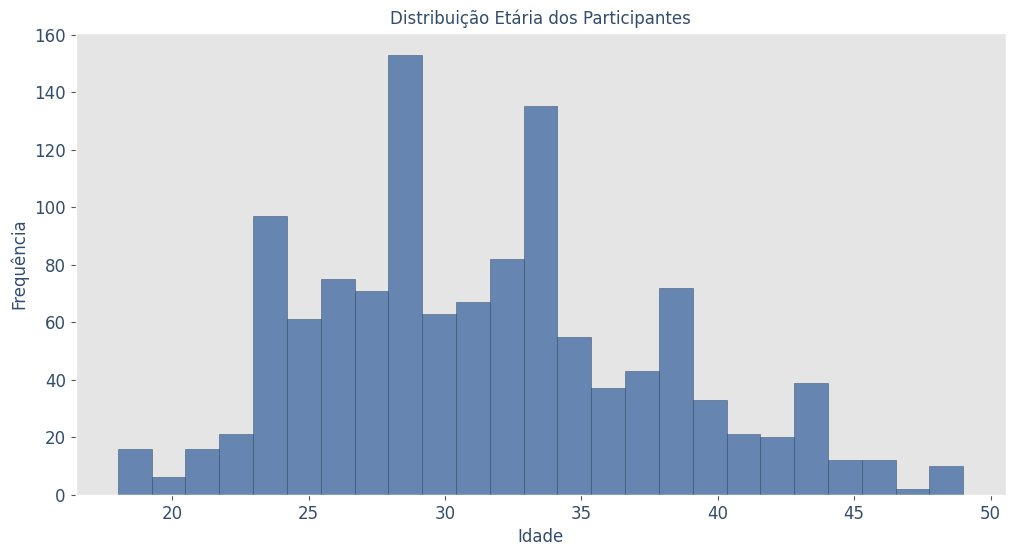

In [ ]:
# Configurar estilo dos gráficos
plt.style.use('ggplot')

# Criar histograma da distribuição etária
plt.figure(figsize=(12, 6))  # Aumentei a largura de 10 para 12
plt.hist(dados['Idade'], bins=25, color='#305e9b', edgecolor='#334D6C', alpha=0.7)

# Definir o estilo da fonte
font_style = {'family': 'DejaVu Sans', 'size': 12, 'color': '#334D6C'}

# Aplicar o mesmo estilo aos números
plt.xticks(fontname='DejaVu Sans', fontsize=12, color='#334D6C')
plt.yticks(fontname='DejaVu Sans', fontsize=12, color='#334D6C')

# Configurar rótulos e título com a fonte personalizada
plt.xlabel('Idade', fontdict=font_style)
plt.ylabel('Frequência', fontdict=font_style)
plt.title('Distribuição Etária dos Participantes', fontdict=font_style)
plt.grid(False)

# Exibir o gráfico
plt.show()

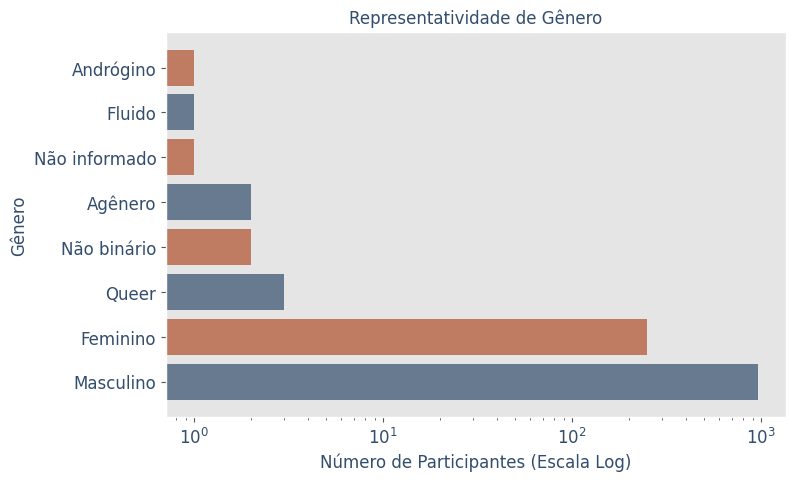

In [ ]:
# Contar a quantidade de participantes por gênero
genero_counts = dados['Genero'].value_counts()

# Definir cores personalizadas
cores = ['#334D6C', '#af502b']

# Criar o gráfico de barras com escala logarítmica para que todos os gêneros estejam visíveis no gráfico pois em alguns deles há uma baixa quantidade de representantes, e em uma escala de contagem normal eles ficariam imperceptíveis de se enxergar na vizualização
plt.figure(figsize=(8, 5))
plt.barh(genero_counts.index, genero_counts.values, color=cores, alpha=0.7)

# Aplicar escala logarítmica ao eixo X
plt.xscale('log')

# Adicionar rótulos e título com fonte personalizada
font_style = {'family': 'DejaVu Sans', 'size': 12, 'color': '#334D6C'}
plt.xlabel('Número de Participantes (Escala Log)', fontdict=font_style)
plt.ylabel('Gênero', fontdict=font_style)
plt.grid(False)
plt.title('Representatividade de Gênero', fontdict=font_style)

# Aplicar o mesmo estilo aos números dos eixos
plt.xticks(fontname='DejaVu Sans', fontsize=12, color='#334D6C')
plt.yticks(fontname='DejaVu Sans', fontsize=12, color='#334D6C')

# Exibir o gráfico
plt.show()

## **2️⃣ Impacto da Saúde Mental no Trabalho**

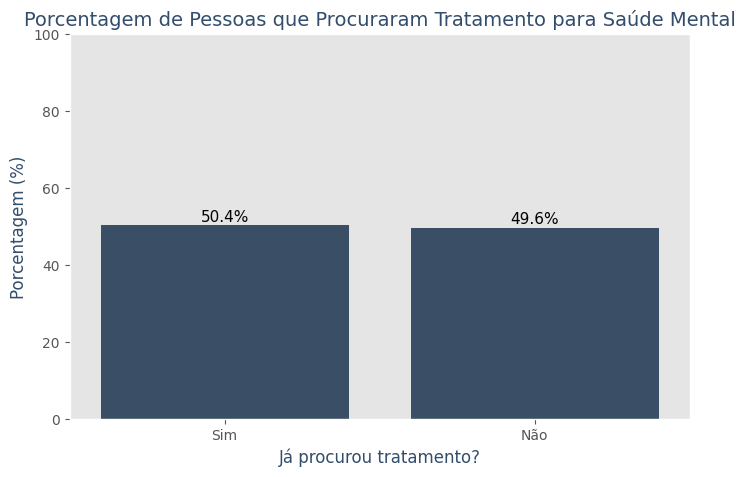

In [ ]:
col_tratamento = "Tratamento"

# Calcular a porcentagem de pessoas que já procuraram tratamento
percentual_tratamento = dados[col_tratamento].value_counts(normalize=True) * 100

# Criar gráfico de colunas com personalização
plt.figure(figsize=(8, 5))
sns.barplot(x=percentual_tratamento.index, y=percentual_tratamento.values, color="#334D6C")

# Personalizar fonte
plt.xlabel("Já procurou tratamento?", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Porcentagem (%)", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.title("Porcentagem de Pessoas que Procuraram Tratamento para Saúde Mental", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.grid(False)

# Adicionar rótulos nos valores das colunas
for i, v in enumerate(percentual_tratamento.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", fontname="DejaVu Sans", fontsize=11)

plt.ylim(0, 100)
plt.show()

<Figure size 1000x800 with 0 Axes>

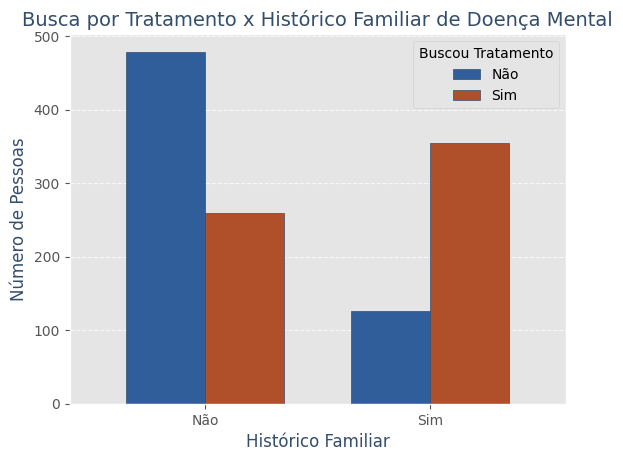

In [ ]:
# Contar a quantidade de pessoas que buscaram tratamento dentro de cada grupo de histórico familiar
contagem = dados.groupby("Historico_familiar")["Tratamento"].value_counts().unstack()

# Criar o gráfico de colunas lado a lado
plt.figure(figsize=(10,8))
contagem.plot(kind="bar", color=["#305e9b", "#af502b"], edgecolor="#334D6C", width=0.7)

# Personalizar o gráfico
plt.title("Busca por Tratamento x Histórico Familiar de Doença Mental", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.xlabel("Histórico Familiar", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Número de Pessoas", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Buscou Tratamento", labels=["Não", "Sim"])
plt.grid(False)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

<Figure size 1000x800 with 0 Axes>

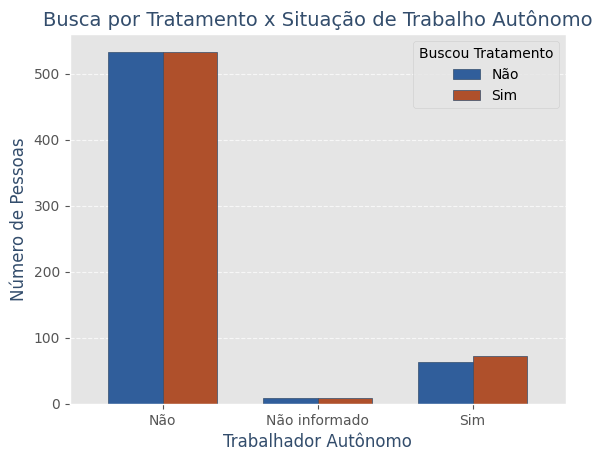


 Tratamento                  Não        Sim
Trabalhador_autonomo                      
Não                   50.000000  50.000000
Não informado         50.000000  50.000000
Sim                   46.666667  53.333333


In [ ]:
# Contar a quantidade de pessoas que buscaram tratamento dentro de cada grupo de trabalhadores (incluindo "Não informado")
contagem = dados.groupby("Trabalhador_autonomo")["Tratamento"].value_counts().unstack()

# Criar o gráfico de colunas lado a lado
plt.figure(figsize=(10,8))
contagem.plot(kind="bar", color=["#305e9b", "#af502b"], edgecolor="#334D6C", width=0.7)

# Personalizar o gráfico
plt.title("Busca por Tratamento x Situação de Trabalho Autônomo", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.xlabel("Trabalhador Autônomo", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Número de Pessoas", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.grid(False)
plt.xticks(rotation=0)
plt.legend(title="Buscou Tratamento", labels=["Não", "Sim"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

# Contar a quantidade de pessoas que buscaram tratamento dentro de cada grupo de trabalhadores (incluindo "Não informado")
contagem = dados.groupby("Trabalhador_autonomo")["Tratamento"].value_counts(normalize=True).unstack()

# Converter para porcentagem
contagem_percentual = contagem * 100
print("\n",contagem_percentual)

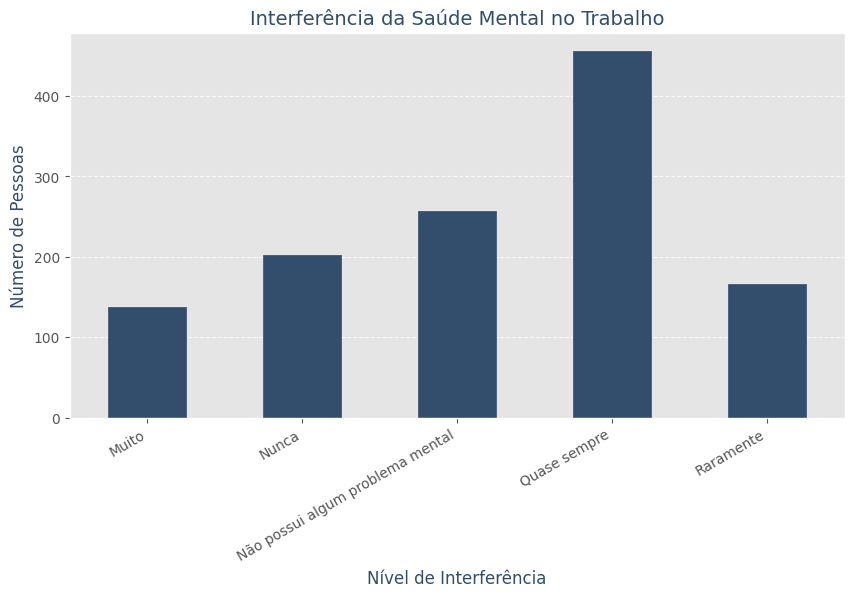

In [ ]:
# Contar a quantidade de respostas para cada nível de interferência
contagem = dados["Interfere_no_trabalho"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 5))  # Aumentei a largura de 8 para 10
contagem.sort_index().plot(kind="bar", color="#334D6C", edgecolor="#334D6C")

# Personalizar o gráfico
plt.title("Interferência da Saúde Mental no Trabalho", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.xlabel("Nível de Interferência", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Número de Pessoas", fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.grid(False)
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

<Figure size 800x500 with 0 Axes>

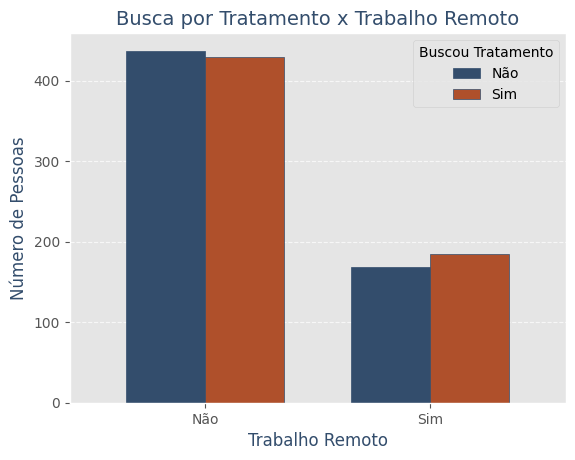


 Tratamento             Não        Sim
Trabalho_remoto                      
Não              50.461894  49.538106
Sim              47.592068  52.407932


In [ ]:
# Contar a quantidade de pessoas que buscaram tratamento dentro de cada grupo de trabalho remoto
contagem = dados.groupby("Trabalho_remoto")["Tratamento"].value_counts().unstack()

# Criar o gráfico de colunas lado a lado
plt.figure(figsize=(8,5))
contagem.plot(kind="bar", color=["#334D6C", "#af502b"], edgecolor="#334D6C", width=0.7)

# Personalizar o gráfico
plt.title("Busca por Tratamento x Trabalho Remoto", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.xlabel("Trabalho Remoto",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Número de Pessoas",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.grid(False)
plt.xticks(rotation=0)
plt.legend(title="Buscou Tratamento", labels=["Não", "Sim"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

# Contar a quantidade de pessoas que buscaram tratamento dentro de cada grupo de trabalho remoto
contagem = dados.groupby("Trabalho_remoto")["Tratamento"].value_counts(normalize=True).unstack()

# Converter para porcentagem
contagem_percentual = contagem * 100
print("\n",contagem_percentual)

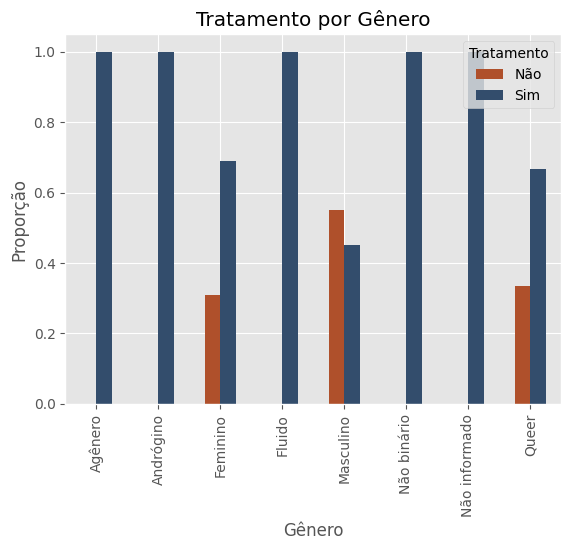

In [ ]:
tratamento_por_genero = dados.groupby('Genero')['Tratamento'].value_counts(normalize=True).unstack()

tratamento_por_genero.plot(kind='bar', color=['#af502b', '#334D6C'],
                            title='Tratamento por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Proporção')
plt.show()

## **3️⃣ Cultura Organizacional e Benefícios**

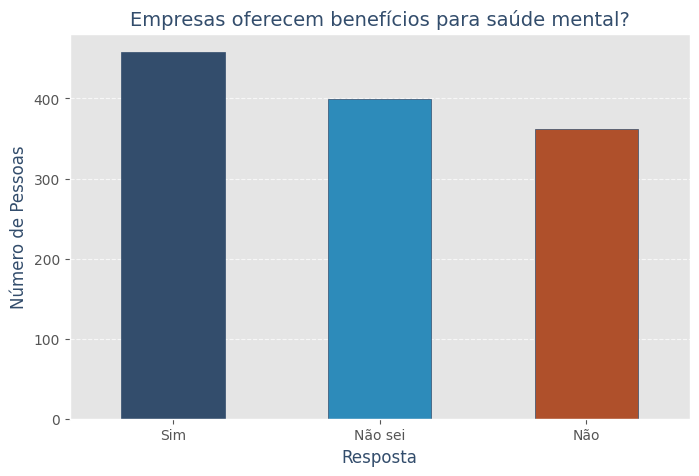

In [ ]:
# Contar a quantidade de respostas sobre benefícios para saúde mental
contagem = dados["Beneficios"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8,5))
contagem.plot(kind="bar", color=["#334D6C", "#2d8bba","#af502b"], edgecolor="#334D6C")

# Personalizar o gráfico
plt.title("Empresas oferecem benefícios para saúde mental?", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.xlabel("Resposta",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Número de Pessoas",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.grid(False)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

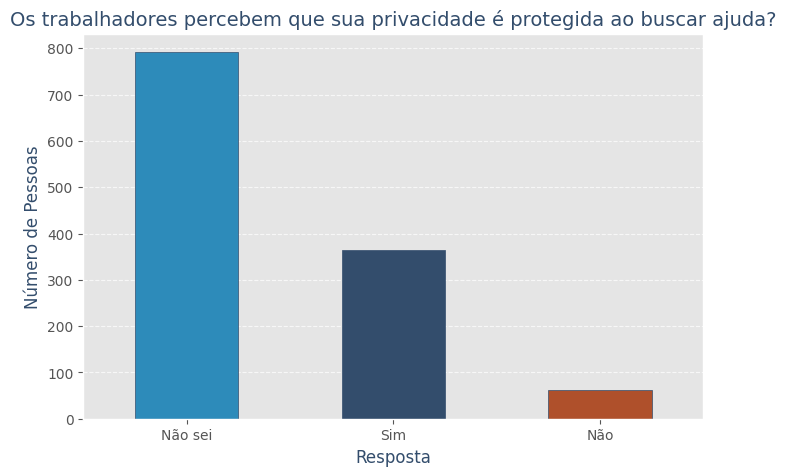

In [ ]:
# Contar a quantidade de respostas sobre anonimato
contagem = dados["Anonimato"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8,5))
contagem.plot(kind="bar", color=["#2d8bba", "#334D6C", "#af502b"], edgecolor="#334D6C")

# Personalizar o gráfico
plt.title("Os trabalhadores percebem que sua privacidade é protegida ao buscar ajuda?", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.xlabel("Resposta",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Número de Pessoas",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.grid(False)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

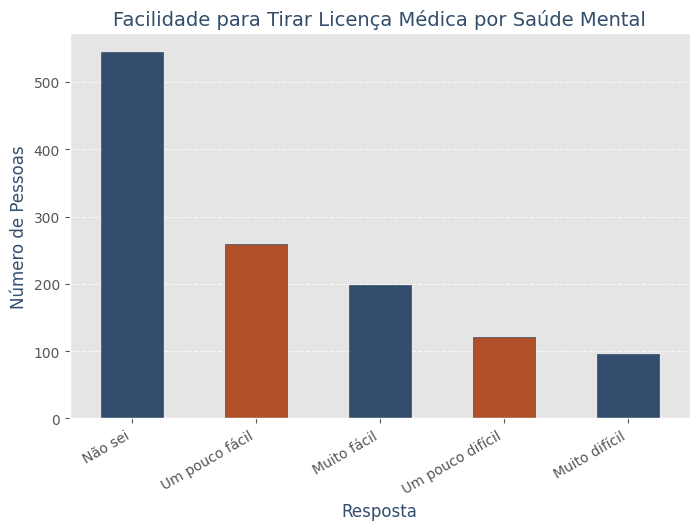

In [ ]:
# Contar a quantidade de respostas sobre licença médica
contagem = dados["Licenca"].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8,5))
contagem.plot(kind="bar", color=["#334D6C", "#af502b"], edgecolor="#334D6C")

# Personalizar o gráfico
plt.title("Facilidade para Tirar Licença Médica por Saúde Mental", fontname="DejaVu Sans", color="#334D6C", fontsize=14)
plt.xlabel("Resposta",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.ylabel("Número de Pessoas",  fontname="DejaVu Sans", color="#334D6C", fontsize=12)
plt.grid(False)
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar o gráfico
plt.show()

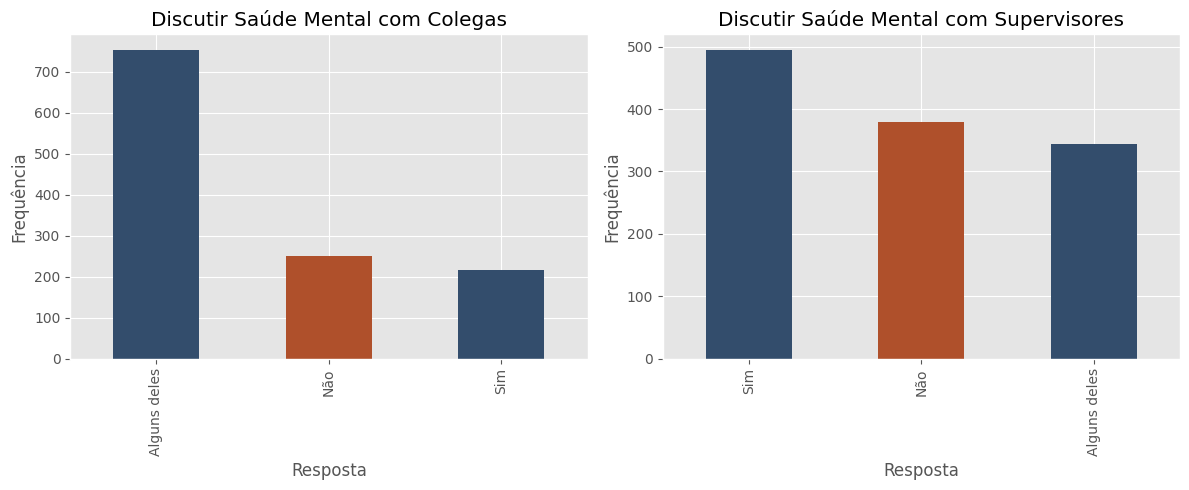

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Gráfico para discutir com colegas
dados['Colegas_de_trabalho'].value_counts().plot(kind='bar', ax=axes[0],
                                                 color=['#334D6C', '#af502b'])
axes[0].set_title('Discutir Saúde Mental com Colegas')
axes[0].set_xlabel('Resposta')
axes[0].set_ylabel('Frequência')

# Gráfico para discutir com supervisores
dados['Supervisor'].value_counts().plot(kind='bar', ax=axes[1],
                                        color=['#334D6C', '#af502b'])
axes[1].set_title('Discutir Saúde Mental com Supervisores')
axes[1].set_xlabel('Resposta')
axes[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()


## **4️⃣ Percepção e Consequências**

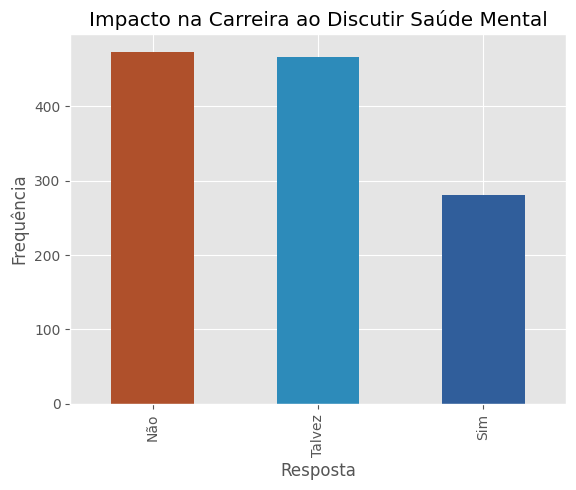

In [ ]:
# Contagem de respostas na coluna "Consequencia_saude_mental"
contagem_consequencia = dados['Consequencia_saude_mental'].value_counts()

# Gráfico de barras
contagem_consequencia.plot(kind='bar', color=['#af502b', '#2d8bba','#305e9b'],
                           title='Impacto na Carreira ao Discutir Saúde Mental')
plt.xlabel('Resposta')
plt.ylabel('Frequência')
plt.show()


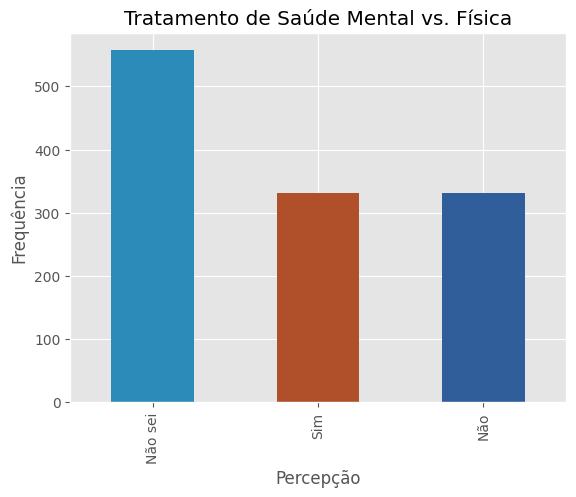

In [ ]:
# Contagem de respostas na coluna "Mental_vs_fisica"
contagem_mental_vs_fisica = dados['Mental_vs_fisica'].value_counts()

# Gráfico de barras
contagem_mental_vs_fisica.plot(kind='bar', color=['#2d8bba','#af502b', '#305e9b'],
                                title='Tratamento de Saúde Mental vs. Física')
plt.xlabel('Percepção')
plt.ylabel('Frequência')
plt.show()


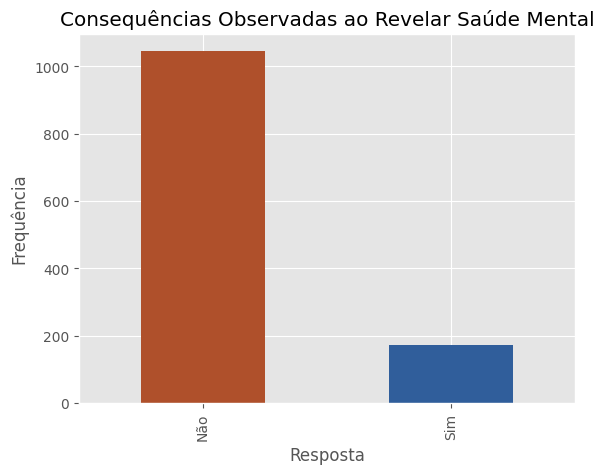

In [ ]:
# Contagem de respostas na coluna "Consequencia_observada"
contagem_obs = dados['Consequencia_observada'].value_counts()

# Gráfico de barras
contagem_obs.plot(kind='bar', color=['#af502b', '#305e9b'],
                  title='Consequências Observadas ao Revelar Saúde Mental')
plt.xlabel('Resposta')
plt.ylabel('Frequência')
plt.show()


## **5️⃣ Comparações entre países**

<Figure size 7000x600 with 0 Axes>

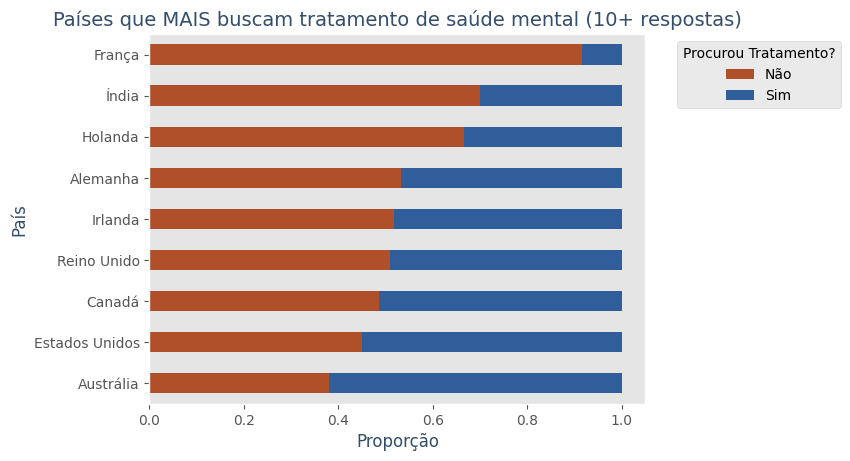

In [ ]:
# Configurar estilo dos gráficos
plt.style.use('ggplot')

# Contar quantas vezes cada país aparece no dataset
contagem_paises = dados["Pais"].value_counts()

# Filtrar apenas os países com 10 ou mais respostas
paises_com_10_respostas = contagem_paises[contagem_paises >= 10].index

# Filtrar o dataset para incluir apenas esses países
dados_filtrados = dados[dados["Pais"].isin(paises_com_10_respostas)]

# Calcular a proporção de "Sim" e "Não" para "Tratamento" em cada país
proporcao_tratamento = (
    dados_filtrados.groupby("Pais")["Tratamento"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Ordenar os países pela proporção de "Sim" (mais buscam)
top_10_mais_buscam = proporcao_tratamento.nlargest(10, "Sim")

# Gráfico para os países que MAIS buscam tratamento
plt.figure(figsize=(70, 6))  # Largura aumentada para 25 (altura mantida em 6)
top_10_mais_buscam.plot(kind="barh", stacked=True, color=["#af502b", "#305e9b"])
plt.title("Países que MAIS buscam tratamento de saúde mental (10+ respostas)", fontsize=14, color="#334D6C")
plt.xlabel("Proporção", fontsize=12, color="#334D6C")
plt.ylabel("País", fontsize=12, color="#334D6C")
plt.legend(title="Procurou Tratamento?", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()

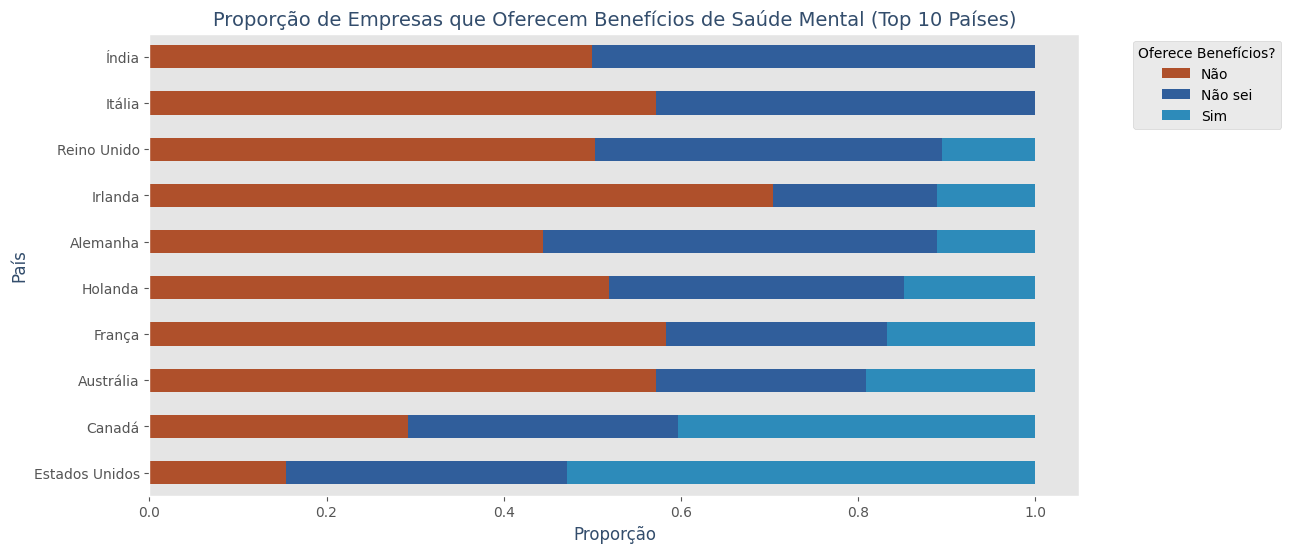

In [ ]:
# Calcular a proporção de "Sim", "Não" e "Não sei" para "Beneficios" em cada país
proporcao_beneficios = (
    dados_top_10.groupby("Pais")["Beneficios"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

# Ordenar os países pela proporção de "Sim"
proporcao_beneficios = proporcao_beneficios.sort_values(by="Sim", ascending=False)

# Criar o gráfico de barras empilhadas
proporcao_beneficios.plot(kind="barh", stacked=True, color=["#af502b", "#305e9b", "#2d8bba"], figsize=(12, 6))

# Personalizar o gráfico
plt.title("Proporção de Empresas que Oferecem Benefícios de Saúde Mental (Top 10 Países)", fontsize=14, color="#334D6C")
plt.xlabel("Proporção", fontsize=12, color="#334D6C")
plt.ylabel("País", fontsize=12, color="#334D6C")
plt.legend(title="Oferece Benefícios?", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show()